<a href="https://colab.research.google.com/github/RaynoldPanjiZ/scraping-and-classification-MobileNet/blob/main/scraping_%26_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bs4 requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import requests
URL = "https://www.google.com/search?q=nanas&tbm=isch&ved=2ahUKEwjUg4Whj8T4AhWTk9gFHcT9D98Q2-cCegQIABAA&oq=nanas&gs_lcp=CgNpbWcQAzIICAAQgAQQsQMyCAgAEIAEELEDMgUIABCABDIICAAQgAQQsQMyCAgAEIAEELEDMggIABCABBCxAzILCAAQgAQQsQMQgwEyCAgAEIAEELEDMggIABCABBCxAzIFCAAQgAQ6BAgjECc6BAgAEEM6CAgAELEDEIMBUP8VWOIaYMUvaABwAHgAgAFaiAGRA5IBATWYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=nqW0YtS8DJOn4t4PxPu_-A0" # Replace this with the website's URL
getURL = requests.get(URL, headers={"User-Agent":"Mozilla/5.0"})
print(getURL.status_code)

200


In [3]:
from bs4 import BeautifulSoup
 
soup = BeautifulSoup(getURL.text, 'html.parser')

In [4]:
images = soup.find_all('img')
print(images)

[<img alt="Google" class="kgJEQe" src="/images/branding/searchlogo/1x/googlelogo_desk_heirloom_color_150x55dp.gif"/>, <img alt="" class="yWs4tf" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSqL6ORxs3lrBecOGdYeb61uhuCID6RiipFEMAbMraWxxqX8tnCvbBuMYyYag&amp;s"/>, <img alt="" class="yWs4tf" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjjA6MkxcDdRTCSYWA2ZpVtOkuzaWuiPzgiQQZVTTEmItkeuu32e5kJaRqCEU&amp;s"/>, <img alt="" class="yWs4tf" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlDyoCJLgKa3F36NnSZoOLL_c4WLFVUCPxNbs6TABIqS2ZLZphxA2XjzTQiaY&amp;s"/>, <img alt="" class="yWs4tf" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThA_sLmi1oHYwW4R7ykRE-HWOeyoAfZ14T8ALVl3dXXTQtLelruVl5yaP9sg&amp;s"/>, <img alt="" class="yWs4tf" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwdytAf_yJ29XSMNNxOjuWUft-7RBTqKqZPJK1K72vlDYdilqn_3MqN-yj4bY&amp;s"/>, <img alt="" class="yWs4tf" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQ5urrVZ

In [5]:
imageSources = []
 
for image in images:
    imageSources.append(image.get('src'))
 
imageSources

['/images/branding/searchlogo/1x/googlelogo_desk_heirloom_color_150x55dp.gif',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSqL6ORxs3lrBecOGdYeb61uhuCID6RiipFEMAbMraWxxqX8tnCvbBuMYyYag&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjjA6MkxcDdRTCSYWA2ZpVtOkuzaWuiPzgiQQZVTTEmItkeuu32e5kJaRqCEU&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlDyoCJLgKa3F36NnSZoOLL_c4WLFVUCPxNbs6TABIqS2ZLZphxA2XjzTQiaY&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThA_sLmi1oHYwW4R7ykRE-HWOeyoAfZ14T8ALVl3dXXTQtLelruVl5yaP9sg&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwdytAf_yJ29XSMNNxOjuWUft-7RBTqKqZPJK1K72vlDYdilqn_3MqN-yj4bY&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQ5urrVZsy3EEvnUrev3Fleh3iJpGpO67TOMam1P33Y2DFcu5MtofDSUZaTA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjOYQSLBhYUT8Y4zVMC0LWc4R_-iyzXkKiod9SlnIakjQkN5dWk91M4SZ7NA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-ijlYv1kaWQ-PI

In [6]:
import re
regex = re.compile(r'https*')
filtered = [i for i in imageSources if  regex.match(i)]
filtered

['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSqL6ORxs3lrBecOGdYeb61uhuCID6RiipFEMAbMraWxxqX8tnCvbBuMYyYag&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjjA6MkxcDdRTCSYWA2ZpVtOkuzaWuiPzgiQQZVTTEmItkeuu32e5kJaRqCEU&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRlDyoCJLgKa3F36NnSZoOLL_c4WLFVUCPxNbs6TABIqS2ZLZphxA2XjzTQiaY&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcThA_sLmi1oHYwW4R7ykRE-HWOeyoAfZ14T8ALVl3dXXTQtLelruVl5yaP9sg&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwdytAf_yJ29XSMNNxOjuWUft-7RBTqKqZPJK1K72vlDYdilqn_3MqN-yj4bY&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQ5urrVZsy3EEvnUrev3Fleh3iJpGpO67TOMam1P33Y2DFcu5MtofDSUZaTA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjOYQSLBhYUT8Y4zVMC0LWc4R_-iyzXkKiod9SlnIakjQkN5dWk91M4SZ7NA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-ijlYv1kaWQ-PIvjZpRedTs3I0uzGWDJveAnMryYXVIfI8mB3iqrZ5Tn2fZA&s',
 'https://encrypted-tbn0.gst

In [7]:
from skimage import io
import matplotlib.pyplot as plt

In [8]:
filtered[0]

'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSqL6ORxs3lrBecOGdYeb61uhuCID6RiipFEMAbMraWxxqX8tnCvbBuMYyYag&s'

In [9]:
len(filtered)

20

In [10]:
import cv2

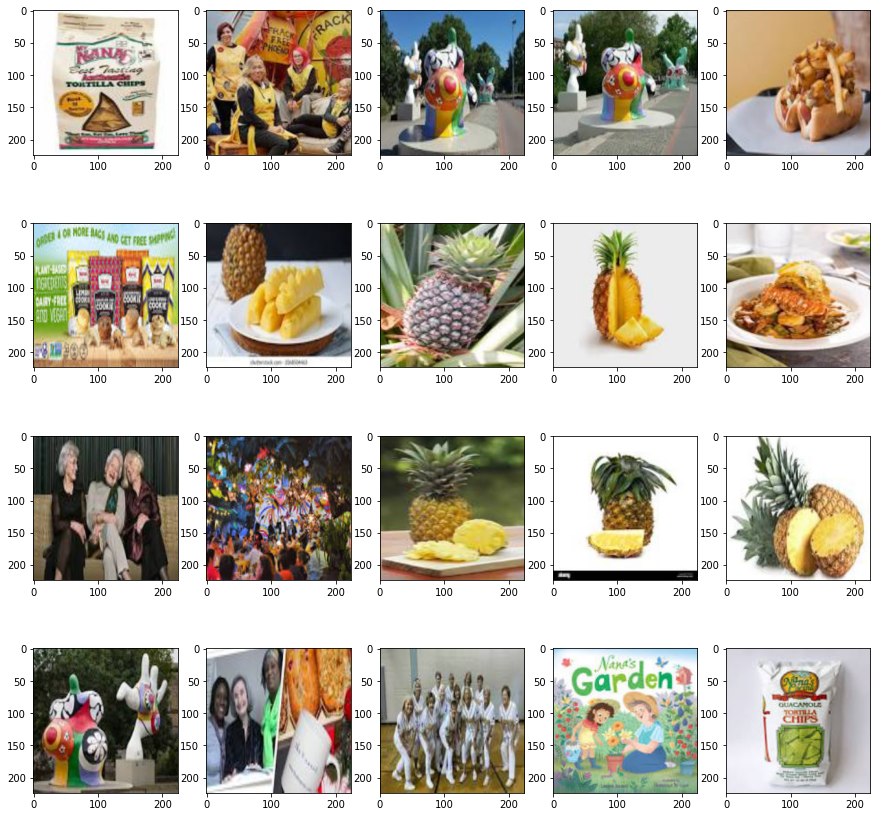

In [11]:
plt.figure(figsize=[15,15])
for im, i in zip(filtered, range(len(filtered))):
  image = io.imread(im)
  image = cv2.resize(image, (224, 224))
  plt.subplot(len(filtered)//5, 5, i+1)
  plt.imshow(image)
plt.show()

In [192]:
!mkdir downloaded
# !rm -rf downloaded/*

In [99]:
response = requests.get(filtered[0])

for im, i in zip(filtered, range(len(filtered))):
  file = open("downloaded/sample_image"+str(i+1)+".png", "wb")
  file.write(response.content)
file.close()

In [12]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

GPU device not found


In [13]:
import keras
import numpy as np
from keras.preprocessing import image

In [14]:
import tensorflow as tf
# from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import MobileNet

model = MobileNet(
    input_shape = (224, 224, 3), 
    weights = 'imagenet' 
)

In [15]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [16]:
image = io.imread(filtered[7])
image = cv2.resize(image, (224, 224))

image.shape

(224, 224, 3)

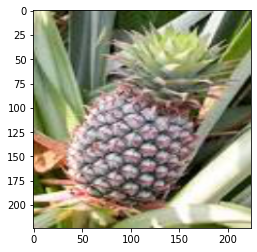

In [17]:
plt.imshow(image)

In [18]:
image = image.reshape(1, 224, 224, 3)
image = keras.applications.mobilenet.preprocess_input(image)

In [19]:
image.shape

(1, 224, 224, 3)

In [20]:
ypred = model.predict(image)

In [21]:
from keras.applications import imagenet_utils

In [22]:
res = imagenet_utils.decode_predictions(ypred)
res

[[('n07753275', 'pineapple', 0.9999833),
  ('n13133613', 'ear', 3.977277e-06),
  ('n07745940', 'strawberry', 3.6565586e-06),
  ('n07760859', 'custard_apple', 2.5697088e-06),
  ('n07730033', 'cardoon', 1.093208e-06)]]

In [23]:
_, label, acc = res[0][0]

In [24]:
acc

0.9999833

In [25]:
print(f"label={label} acc={acc:.2f}")

label=pineapple acc=1.00


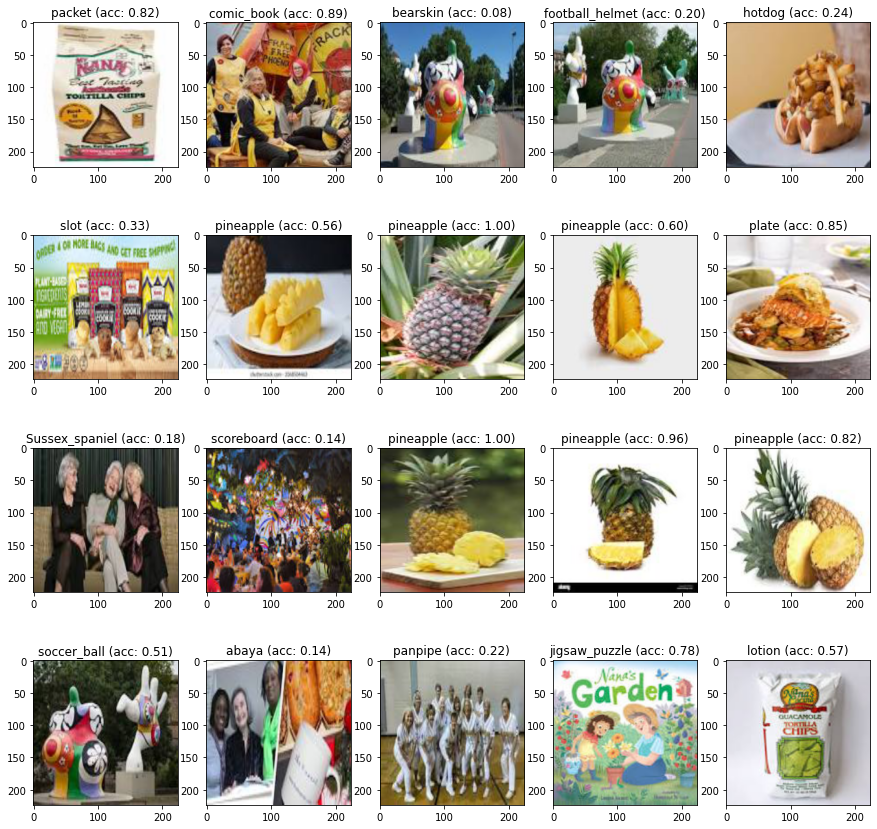

In [26]:
plt.figure(figsize=[15,15])
for im, i in zip(filtered, range(len(filtered))):
  image = io.imread(im)
  image = cv2.resize(image, (224, 224))
  img = image.reshape(1, 224, 224, 3)
  img = keras.applications.mobilenet.preprocess_input(img)
  ypred = model.predict(img)
  res = imagenet_utils.decode_predictions(ypred)
  _, label, acc = res[0][0]
  plt.subplot(len(filtered)//5, 5, i+1)
  plt.imshow(image)
  plt.title(f"{label} (acc: {acc:.2f})")
plt.show()